# CSV and mapping exploration

In [8]:
pip install quakefeeds

In [9]:
pip install geopandas

In [10]:
pip install dash

In [0]:
import geopandas as gpd
import pandas as pd

In [12]:
# data = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.geojson'
data = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv'
# df = gpd.read_file(data)
df = pd.read_csv(data)
crs = {'init': 'epsg:4326'}
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-04-28T00:53:22.670Z,19.208666,-155.376999,32.47,1.82,md,21.0,184.0,0.03461,0.11,hv,hv71491492,2020-04-28T00:56:43.270Z,"10km E of Pahala, Hawaii",earthquake,0.81,1.13,0.010,3.0,automatic,hv,hv
1,2020-04-28T00:49:39.710Z,38.808998,-122.822830,1.56,0.56,md,7.0,140.0,0.01391,0.01,nc,nc73377545,2020-04-28T00:57:06.689Z,"7km WNW of The Geysers, CA",earthquake,0.53,1.30,NaN,1.0,automatic,nc,nc
2,2020-04-28T00:39:26.100Z,34.056500,-116.845833,13.11,1.18,ml,45.0,47.0,0.03810,0.19,ci,ci39408016,2020-04-28T00:50:17.680Z,"15km N of Banning, CA",earthquake,0.23,0.52,0.130,27.0,automatic,ci,ci
3,2020-04-28T00:38:06.201Z,44.326100,-115.116000,10.00,2.50,ml,NaN,64.0,0.31400,0.64,us,us60009dmj,2020-04-28T00:46:04.040Z,"73km WSW of Challis, Idaho",earthquake,2.80,2.00,0.051,50.0,reviewed,us,us
4,2020-04-28T00:17:33.390Z,17.966300,-66.807800,14.00,2.61,md,19.0,187.0,0.21560,0.15,pr,pr2020119000,2020-04-28T00:39:52.205Z,"3km SSE of Indios, Puerto Rico",earthquake,0.54,0.76,0.160,10.0,reviewed,pr,pr


In [0]:
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

In [0]:
world = gpd.read_file('/content/TM_WORLD_BORDERS-0.3.shp')

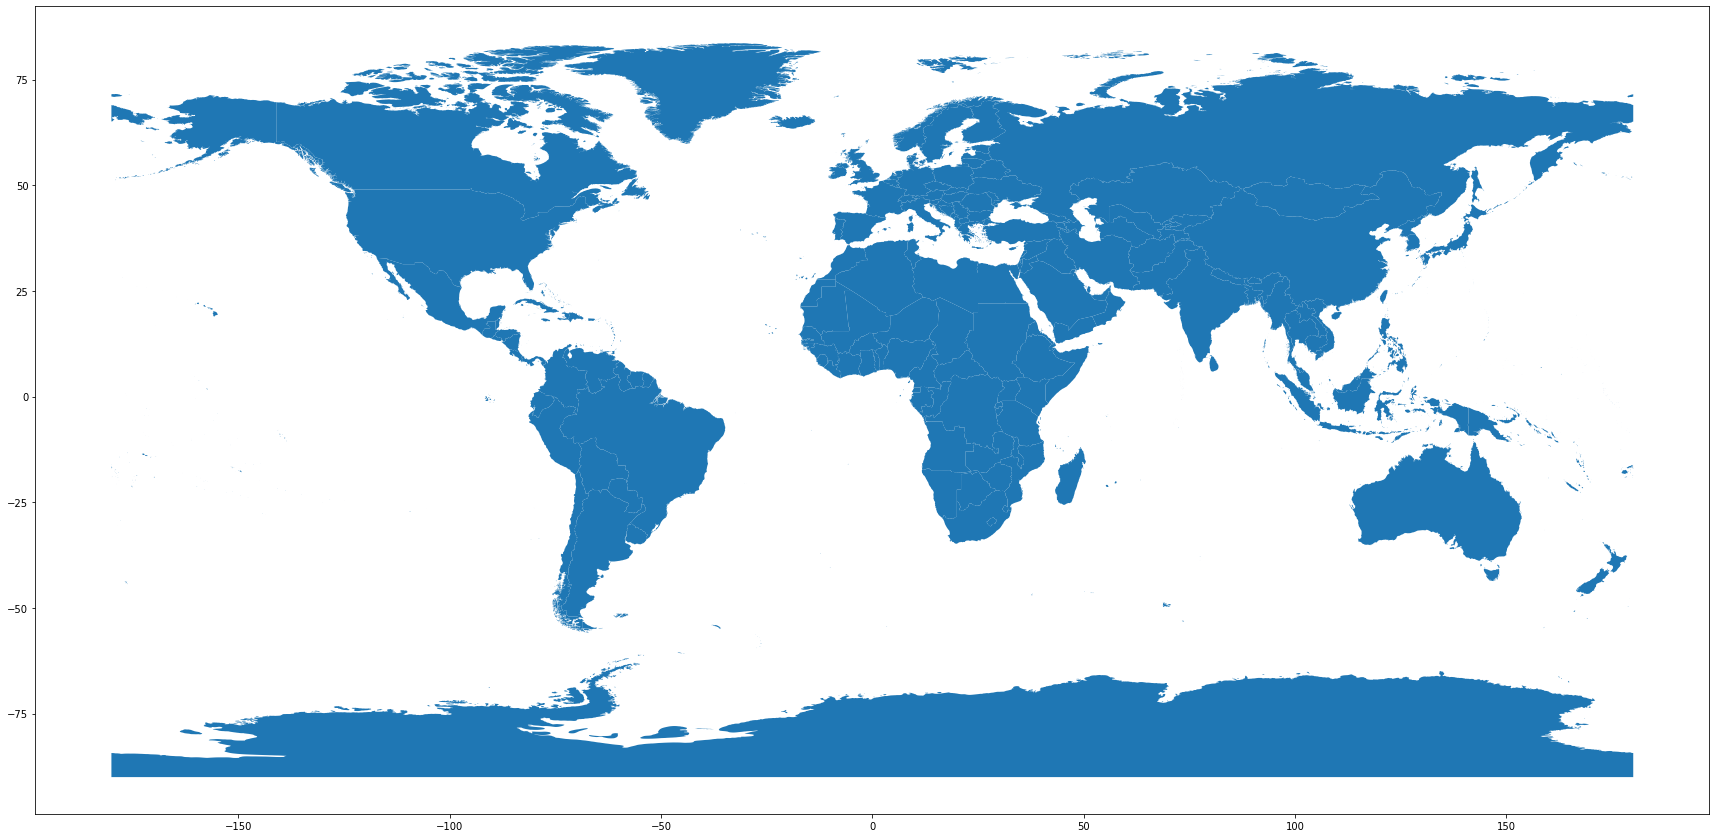

In [15]:
fig, ax = plt.subplots(figsize=(30, 30))
world.plot(ax = ax)

In [16]:
geometry = [Point(xy) for xy in zip( df['longitude'], df['latitude'])]
geometry[:3]

In [17]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo_df.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2020-04-28T00:53:22.670Z,19.208666,-155.376999,32.47,1.82,md,21.0,184.0,0.03461,0.11,hv,hv71491492,2020-04-28T00:56:43.270Z,"10km E of Pahala, Hawaii",earthquake,0.81,1.13,0.010,3.0,automatic,hv,hv,POINT (-155.37700 19.20867)
1,2020-04-28T00:49:39.710Z,38.808998,-122.822830,1.56,0.56,md,7.0,140.0,0.01391,0.01,nc,nc73377545,2020-04-28T00:57:06.689Z,"7km WNW of The Geysers, CA",earthquake,0.53,1.30,NaN,1.0,automatic,nc,nc,POINT (-122.82283 38.80900)
2,2020-04-28T00:39:26.100Z,34.056500,-116.845833,13.11,1.18,ml,45.0,47.0,0.03810,0.19,ci,ci39408016,2020-04-28T00:50:17.680Z,"15km N of Banning, CA",earthquake,0.23,0.52,0.130,27.0,automatic,ci,ci,POINT (-116.84583 34.05650)
3,2020-04-28T00:38:06.201Z,44.326100,-115.116000,10.00,2.50,ml,NaN,64.0,0.31400,0.64,us,us60009dmj,2020-04-28T00:46:04.040Z,"73km WSW of Challis, Idaho",earthquake,2.80,2.00,0.051,50.0,reviewed,us,us,POINT (-115.11600 44.32610)
4,2020-04-28T00:17:33.390Z,17.966300,-66.807800,14.00,2.61,md,19.0,187.0,0.21560,0.15,pr,pr2020119000,2020-04-28T00:39:52.205Z,"3km SSE of Indios, Puerto Rico",earthquake,0.54,0.76,0.160,10.0,reviewed,pr,pr,POINT (-66.80780 17.96630)


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


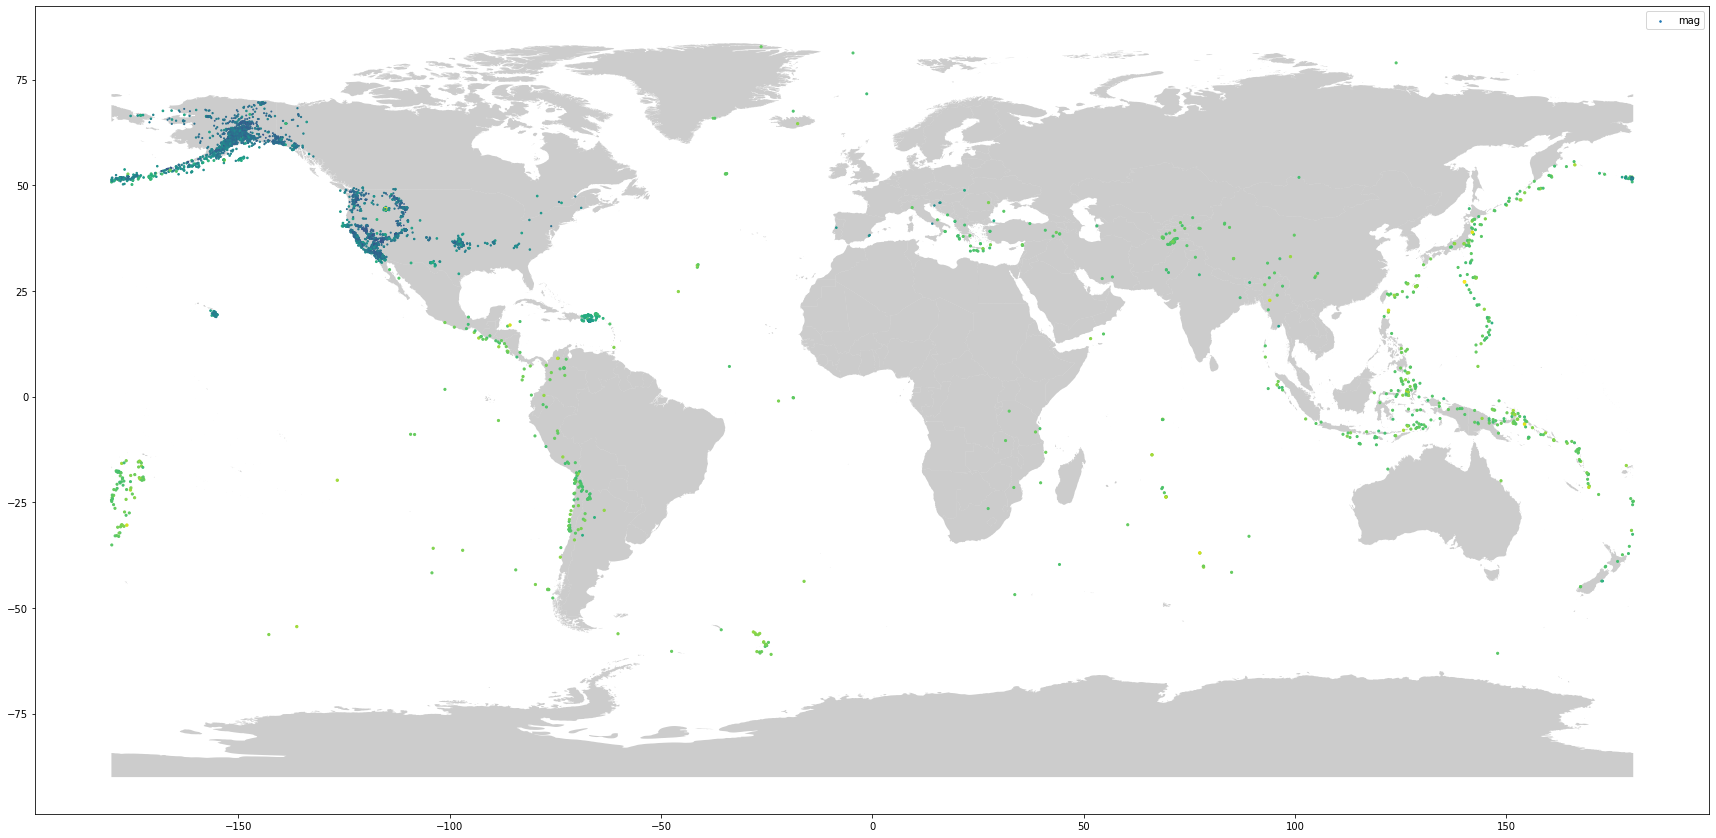

In [18]:
fig, ax = plt.subplots(figsize = (30, 30))
world.plot(ax=ax, alpha = 0.4, color='grey')
plt.scatter(x = df['longitude'], y = df['latitude'], c = df['mag'], marker = 'o', label = 'mag', s=df['mag'])
plt.legend(loc="upper right")

In [0]:
# pk.eyJ1IjoibGVjaGVtcmMiLCJhIjoiY2s4eHgxZjY4MWNneTNmcHJyaXdyeWFuaiJ9.IGpe6KgBpbnOOiKWE0VLtw

# GeoJSON with geopandas

In [0]:
#import necessary libraries
import numpy as np 
import pandas as pd
import plotly as py
import sklearn
import plotly.offline as offline
import plotly.graph_objs as go
import geopandas as gpd
import datetime

In [21]:
thirty = gpd.read_file('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.geojson')
col_list = []
for col in thirty.columns:
    col_list.append(col)

col_list

['id',
 'mag',
 'place',
 'time',
 'updated',
 'tz',
 'url',
 'detail',
 'felt',
 'cdi',
 'mmi',
 'alert',
 'status',
 'tsunami',
 'sig',
 'net',
 'code',
 'ids',
 'sources',
 'types',
 'nst',
 'dmin',
 'rms',
 'gap',
 'magType',
 'type',
 'title',
 'geometry']

In [0]:
thirty['dist_from_city'] = thirty['place'].str.split('of ', expand=True)[0]
thirty['city'] = thirty['place'].str.split('of ', expand=True)[1]
thirty['city'] = thirty['city'].str.split(', ', expand=True)[0]
thirty['country'] = thirty['place'].str.split(', ', expand=True)[1]

In [23]:
geo = thirty[['geometry', 'city', 'country']]
geo.head()

,geometry,city,country
0,POINT Z (-155.37700 19.20867 32.47000),Pahala,Hawaii
1,POINT Z (-122.82283 38.80900 1.56000),The Geysers,CA
2,POINT Z (-116.84583 34.05650 13.11000),Banning,CA
3,POINT Z (-115.11600 44.32610 10.00000),Challis,Idaho
4,POINT Z (-66.80780 17.96630 14.00000),Indios,Puerto Rico


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



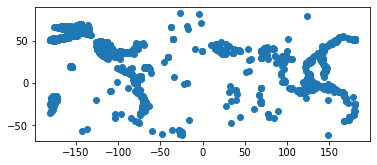

In [24]:
geo['centroid_col'] = geo['geometry'].centroid
geo = geo.set_geometry('centroid_col')
geo.plot();

In [25]:
geo.head()

,geometry,city,country,centroid_col
0,POINT Z (-155.37700 19.20867 32.47000),Pahala,Hawaii,POINT (-155.37700 19.20867)
1,POINT Z (-122.82283 38.80900 1.56000),The Geysers,CA,POINT (-122.82283 38.80900)
2,POINT Z (-116.84583 34.05650 13.11000),Banning,CA,POINT (-116.84583 34.05650)
3,POINT Z (-115.11600 44.32610 10.00000),Challis,Idaho,POINT (-115.11600 44.32610)
4,POINT Z (-66.80780 17.96630 14.00000),Indios,Puerto Rico,POINT (-66.80780 17.96630)


In [0]:
geo['lat'] = [geo['geometry'][i].x for i in range(len(geo['geometry']))]
geo['long'] = [geo['geometry'][i].y for i in range(len(geo['geometry']))]
geo['depth'] = [geo['geometry'][i].z for i in range(len(geo['geometry']))]

In [27]:
geo.head(10)

,geometry,city,country,centroid_col,lat,long,depth
0,POINT Z (-155.37700 19.20867 32.47000),Pahala,Hawaii,POINT (-155.37700 19.20867),-155.376999,19.208666,32.47
1,POINT Z (-122.82283 38.80900 1.56000),The Geysers,CA,POINT (-122.82283 38.80900),-122.822830,38.808998,1.56
2,POINT Z (-116.84583 34.05650 13.11000),Banning,CA,POINT (-116.84583 34.05650),-116.845833,34.056500,13.11
3,POINT Z (-115.11600 44.32610 10.00000),Challis,Idaho,POINT (-115.11600 44.32610),-115.116000,44.326100,10.00
4,POINT Z (-66.80780 17.96630 14.00000),Indios,Puerto Rico,POINT (-66.80780 17.96630),-66.807800,17.966300,14.00
5,POINT Z (-122.81850 38.81417 2.43000),The Geysers,CA,POINT (-122.81850 38.81417),-122.818497,38.814167,2.43
6,POINT Z (-116.73683 33.23700 11.63000),Lake Henshaw,CA,POINT (-116.73683 33.23700),-116.736833,33.237000,11.63
7,POINT Z (-150.59120 60.70510 47.70000),Sterling,Alaska,POINT (-150.59120 60.70510),-150.591200,60.705100,47.70
8,POINT Z (-172.90050 -16.38740 10.00000),Hihifo,Tonga,POINT (-172.90050 -16.38740),-172.900500,-16.387400,10.00
9,POINT Z (-122.81934 38.81483 2.88000),The Geysers,CA,POINT (-122.81934 38.81483),-122.819336,38.814835,2.88


In [28]:
geo.head()

,geometry,city,country,centroid_col,lat,long,depth
0,POINT Z (-155.37700 19.20867 32.47000),Pahala,Hawaii,POINT (-155.37700 19.20867),-155.376999,19.208666,32.47
1,POINT Z (-122.82283 38.80900 1.56000),The Geysers,CA,POINT (-122.82283 38.80900),-122.822830,38.808998,1.56
2,POINT Z (-116.84583 34.05650 13.11000),Banning,CA,POINT (-116.84583 34.05650),-116.845833,34.056500,13.11
3,POINT Z (-115.11600 44.32610 10.00000),Challis,Idaho,POINT (-115.11600 44.32610),-115.116000,44.326100,10.00
4,POINT Z (-66.80780 17.96630 14.00000),Indios,Puerto Rico,POINT (-66.80780 17.96630),-66.807800,17.966300,14.00


In [29]:
help(geo['geometry'][0].centroid)

Help on Point in module shapely.geometry.point object:

class Point(shapely.geometry.base.BaseGeometry)
 |  A zero dimensional feature
 |  
 |  A point has zero length and zero area.
 |  
 |  Attributes
 |  ----------
 |  x, y, z : float
 |      Coordinate values
 |  
 |  Example
 |  -------
 |    >>> p = Point(1.0, -1.0)
 |    >>> print(p)
 |    POINT (1.0000000000000000 -1.0000000000000000)
 |    >>> p.y
 |    -1.0
 |    >>> p.x
 |    1.0
 |  
 |  Method resolution order:
 |      Point
 |      shapely.geometry.base.BaseGeometry
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args)
 |      Parameters
 |      ----------
 |      There are 2 cases:
 |      
 |      1) 1 parameter: this must satisfy the numpy array protocol.
 |      2) 2 or more parameters: x, y, z : float
 |          Easting, northing, and elevation.
 |  
 |  array_interface(self)
 |      Provide the Numpy array protocol.
 |  
 |  svg(self, scale_factor=1.0, fill_color=None)
 |      Return

# WRANGLING FUNCTION

In [0]:
thirty = gpd.read_file('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.geojson')

In [0]:
def wrangle(df):
    """ Wrangles the data """ 

    geo = df.copy()

    # Parse the city and country/state
    geo['dist_from_city'] = geo['place'].str.split('of ', expand=True)[0]
    geo['city'] = geo['place'].str.split('of ', expand=True)[1]
    geo['city'] = geo['city'].str.split(', ', expand=True)[0]
    geo['country_state'] = geo['place'].str.split(', ', expand=True)[1]

    # Parse the latitude, longitude, and the depth for each seismic event
    geo['lat'] = [geo['geometry'][i].x for i in range(len(geo['geometry']))]
    geo['long'] = [geo['geometry'][i].y for i in range(len(geo['geometry']))]
    geo['depth'] = [geo['geometry'][i].z for i in range(len(geo['geometry']))]

    # Convert time columns to datetime format
    geo['time_dt'] = [datetime.datetime.fromtimestamp(
        i / 1000) for i in geo['time']]
    geo['updated_dt'] = [datetime.datetime.fromtimestamp(
        i / 1000) for i in geo['updated']]

    # Return wrangled dataframe 
    return geo

In [32]:
wrangle(thirty)

,id,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,alert,status,tsunami,sig,net,code,ids,sources,types,nst,dmin,rms,gap,magType,type,title,geometry,dist_from_city,city,country_state,lat,long,depth,time_dt,updated_dt
0,hv71491492,1.82,"10km E of Pahala, Hawaii",1588035202670,1588035403270,-600.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,None,automatic,0,51,hv,71491492,",hv71491492,",",hv,",",geoserve,origin,phase-data,",21.0,0.03461,0.11,184.0,md,earthquake,"M 1.8 - 10km E of Pahala, Hawaii",POINT Z (-155.37700 19.20867 32.47000),10km E,Pahala,Hawaii,-155.376999,19.208666,32.47,2020-04-28 00:53:22.670,2020-04-28 00:56:43.270
1,nc73377545,0.56,"7km WNW of The Geysers, CA",1588034979710,1588035843729,-480.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,None,automatic,0,5,nc,73377545,",nc73377545,",",nc,",",geoserve,nearby-cities,origin,phase-data,scit...",7.0,0.01391,0.01,140.0,md,earthquake,"M 0.6 - 7km WNW of The Geysers, CA",POINT Z (-122.82283 38.80900 1.56000),7km WNW,The Geysers,CA,-122.822830,38.808998,1.56,2020-04-28 00:49:39.710,2020-04-28 01:04:03.729
2,ci39408016,1.18,"15km N of Banning, CA",1588034366100,1588035017680,-480.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,None,automatic,0,21,ci,39408016,",ci39408016,",",ci,",",focal-mechanism,geoserve,nearby-cities,origin...",45.0,0.03810,0.19,47.0,ml,earthquake,"M 1.2 - 15km N of Banning, CA",POINT Z (-116.84583 34.05650 13.11000),15km N,Banning,CA,-116.845833,34.056500,13.11,2020-04-28 00:39:26.100,2020-04-28 00:50:17.680
3,us60009dmj,2.50,"73km WSW of Challis, Idaho",1588034286201,1588034764040,-420.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,None,reviewed,0,96,us,60009dmj,",us60009dmj,",",us,",",geoserve,origin,phase-data,",NaN,0.31400,0.64,64.0,ml,earthquake,"M 2.5 - 73km WSW of Challis, Idaho",POINT Z (-115.11600 44.32610 10.00000),73km WSW,Challis,Idaho,-115.116000,44.326100,10.00,2020-04-28 00:38:06.201,2020-04-28 00:46:04.040
4,pr2020119000,2.61,"3km SSE of Indios, Puerto Rico",1588033053390,1588034392205,-240.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1.0,2.0,NaN,None,reviewed,0,105,pr,2020119000,",pr2020119000,",",pr,",",dyfi,geoserve,origin,phase-data,",19.0,0.21560,0.15,187.0,md,earthquake,"M 2.6 - 3km SSE of Indios, Puerto Rico",POINT Z (-66.80780 17.96630 14.00000),3km SSE,Indios,Puerto Rico,-66.807800,17.966300,14.00,2020-04-28 00:17:33.390,2020-04-28 00:39:52.205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15551,pr2020089002,2.74,"7km SSE of Ponce, Puerto Rico",1585444401810,1587685052040,-240.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,2.0,2.0,NaN,None,reviewed,0,116,pr,2020089002,",pr2020089002,us70008i1p,",",pr,us,",",dyfi,geoserve,origin,phase-data,",20.0,0.09170,0.16,185.0,md,earthquake,"M 2.7 - 7km SSE of Ponce, Puerto Rico",POINT Z (-66.60400 17.95110 6.00000),7km SSE,Ponce,Puerto Rico,-66.604000,17.951100,6.00,2020-03-29 01:13:21.810,2020-04-23 23:37:32.040
15552,ak020437hk2k,1.20,"12km NE of Willow, Alaska",1585444244697,1586270653046,-540.0,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,NaN,None,reviewed,0,22,ak,020437hk2k,",ak020437hk2k,",",ak,",",geoserve,origin,phase-data,",NaN,NaN,0.48,NaN,ml,earthquake,"M 1.2 - 12km NE of Willow, Alaska",POINT Z (-149.86100 61.81680 34.60000),12km NE,Willow,Alaska,-149.861000,61.816800,34.60,2020-03-29 01:10:44.697,2020-04-07 14:44:13.046
15553,ak020437gvdq,1.20,"72km S of Ruby, Alaska",1585444043505,1586270700176,-540.0,https://earthquake.usgs.gov/earthquake

# Geocoder function

In [33]:
pip install geocoder

     |████████████████████████████████| 102kB 2.3MB/s 


In [34]:
pip install geopy

In [35]:
from geopy.geocoders import Nominatim

locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('South Salt Lake, United States')

print((location.latitude, location.longitude))
print(location.raw)

(40.7074741, -111.8882709)
{'place_id': 234981392, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 198767, 'boundingbox': ['40.686329', '40.7259806', '-111.928402', '-111.871261'], 'lat': '40.7074741', 'lon': '-111.8882709', 'display_name': 'South Salt Lake, Utah, United States of America', 'class': 'boundary', 'type': 'administrative', 'importance': 0.8982357871776301, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_boundary_administrative.p.20.png'}
